In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score
import lightgbm as lgbm
from sklearn.ensemble import RandomForestClassifier
#import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Apziva/Project1_Customer/inputData'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Apziva/Project1_Customer/inputData/ACME-HappinessSurvey2020.csv


In [30]:
data = pd.read_csv('/content/drive/MyDrive/Apziva/Project1_Customer/inputData/ACME-HappinessSurvey2020.csv')

In [ ]:
print(data.shape)
print(data[:10])

(126, 7)
   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5
5  1   5   5   3   5   5   5
6  0   3   1   2   2   1   3
7  1   5   4   4   4   4   5
8  0   4   1   4   4   4   4
9  0   4   4   4   2   5   5


In [ ]:
data.columns = ['happiness_level', 'timely_delivery', 'cust_content', 'ordered_every', 'good_price', 'courier_service', 'easyOrder_app']
data['happiness_level'].value_counts()

1    69
0    57
Name: happiness_level, dtype: int64

# Exploratory Data Analysis

In [ ]:
corr = data.corr()
corr

,happiness_level,timely_delivery,cust_content,ordered_every,good_price,courier_service,easyOrder_app
happiness_level,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
timely_delivery,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
cust_content,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
ordered_every,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
good_price,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
courier_service,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
easyOrder_app,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


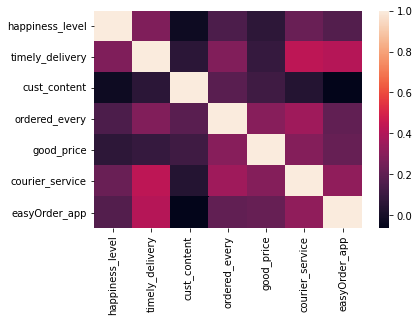

In [ ]:
sns.heatmap(corr)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

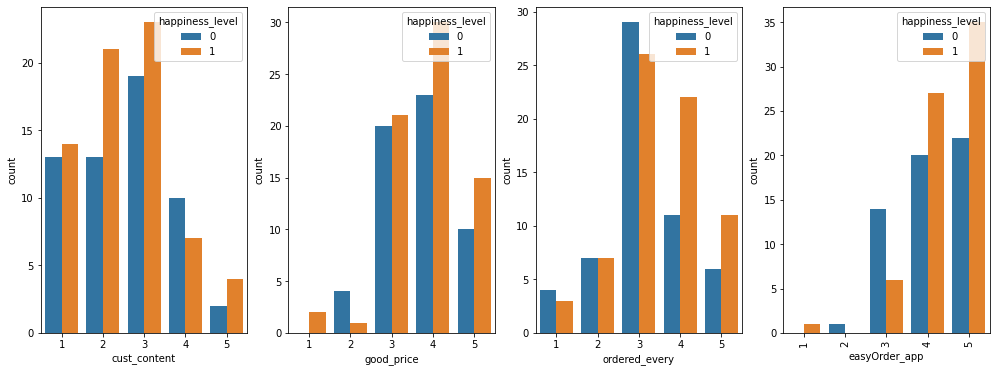

In [ ]:
f, axes = plt.subplots(ncols=4,figsize=(17,6))

sns.countplot(x='cust_content',hue='happiness_level',ax=axes[0],data=data)
sns.countplot(x='good_price',hue='happiness_level',ax=axes[1],data=data)
sns.countplot(x='ordered_every',hue='happiness_level',ax=axes[2],data=data)
sns.countplot(x='easyOrder_app',hue='happiness_level',ax=axes[3],data=data)
plt.xticks(rotation=90)
#plt.xlabel('Department')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

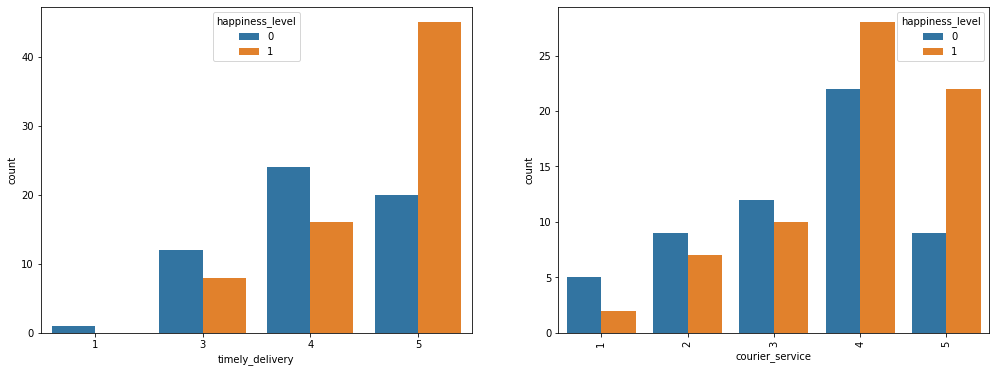

In [ ]:
f, axes = plt.subplots(ncols=2,figsize=(17,6))

sns.countplot(x='timely_delivery',hue='happiness_level',ax=axes[0],data=data)
sns.countplot(x='courier_service',hue='happiness_level',ax=axes[1],data=data)
plt.xticks(rotation=90)
#plt.xlabel('Department')

### Note:
1. From the EDA chart of each features we can see conclude that- there are 3 featuers whcich has a strong correlation to the target as compared to otehr features and they are "timely_delivery"(X1), "easyOrder_app"(X6) and "courier_service". (X5)
2. "cust_content" (feature X2) has an inverse correlation with the target "happiness_level" whcih can be considered as the least important fetaures and can be removed from the question set.

## Train Test Split

In [ ]:
#No missing values. Let's split off the target and create a different dataframe with features.
y=data["happiness_level"]
X=data.drop(columns=["happiness_level"])

In [ ]:
XOld=data.iloc[:,1:len(data.columns)]
print(X[:10])

   timely_delivery  cust_content  ordered_every  good_price  courier_service  \
0                3             3              3           4                2   
1                3             2              3           5                4   
2                5             3              3           3                3   
3                5             4              3           3                3   
4                5             4              3           3                3   
5                5             5              3           5                5   
6                3             1              2           2                1   
7                5             4              4           4                4   
8                4             1              4           4                4   
9                4             4              4           2                5   

   easyOrder_app  
0              4  
1              3  
2              5  
3              5  
4              5  
5    

In [ ]:
#y=data.iloc[:,:1]
y=np.ravel(y) 
print(y[:10])

[0 0 1 0 0 1 0 1 0 0]


In [ ]:
#X=np.array

In [ ]:
trainData, testData, trainLabel, testLabel = train_test_split(X,y, test_size=0.15, stratify=y)
print("Train Set:",trainData.shape)
print("Test Set:",testData.shape)

Train Set: (107, 6)
Test Set: (19, 6)


### For the final Random Forest model try dividing the data by 5 so all numbers are in between 0 to 1 instead of 0 to 5

In [ ]:
trainData=trainData/5.0
testData=testData/5.0

In [ ]:
trainData[:10]

,timely_delivery,cust_content,ordered_every,good_price,courier_service,easyOrder_app
72,0.8,0.6,0.6,0.8,0.4,0.8
50,1.0,0.2,0.6,0.6,0.8,0.8
87,0.8,0.2,0.6,0.8,0.8,0.6
23,1.0,0.2,0.4,1.0,0.4,0.8
101,1.0,0.6,0.8,0.6,0.8,0.6
7,1.0,0.8,0.8,0.8,0.8,1.0
68,1.0,0.2,1.0,1.0,1.0,1.0
44,0.6,0.2,0.4,0.8,0.6,1.0
121,1.0,0.4,0.6,0.8,0.8,0.6
102,1.0,0.4,0.6,0.6,0.6,1.0


In [ ]:
X.shape

(126, 6)

# Trying few ML models

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
bin_lgstRegres = LogisticRegression(max_iter=100, tol=0.1, solver='liblinear')
lgstRegress=bin_lgstRegres.fit(trainData, trainLabel)
lgstRegres_predictn=bin_lgstRegres.predict(testData)
print(classification_report(testLabel, lgstRegres_predictn))

              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.55      0.92      0.69        13

    accuracy                           0.58        26
   macro avg       0.65      0.58      0.52        26
weighted avg       0.65      0.58      0.52        26



In [ ]:
# feature importance
print(bin_lgstRegres.feature_importances_)
# plot
plt.bar(range(len(bin_lgstRegres.feature_importances_)), bin_lgstRegres.feature_importances_)
plt.show()

# XGBoost Classifier

In [ ]:
from xgboost.sklearn import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(trainData, trainLabel)
predict_Label=model_xgb.predict(testData)
print(classification_report(testLabel, predict_Label))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.56      0.69      0.62        13

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.57        26
weighted avg       0.58      0.58      0.57        26



[0.20073678 0.12801442 0.16689242 0.13271227 0.15833044 0.21331364]


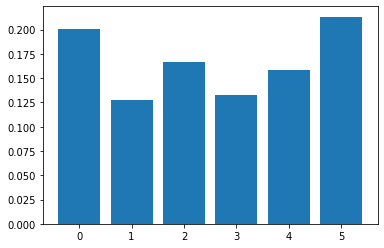

In [ ]:
# feature importance
print(model_xgb.feature_importances_)
# plot
plt.bar(range(len(model_xgb.feature_importances_)), model_xgb.feature_importances_)
plt.show()

### 
Note: According to the above model, timely_delivery, ordered_every, courier_service and easyOrder_app are the important features

# LightGBM Classifier

In [ ]:
# making lgbm datasets for train and valid
d_train = lgbm.Dataset(trainData, trainLabel)
d_valid = lgbm.Dataset(testData, testLabel)
#set of parameters for lgbm
params = {
    'objective' :'binary',
    'num_leaves' : 76,
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss',
    'learning_rate' : 0.03,
    'max_depth':5
}

lgmb_model = lgbm.train(params, d_train, 100,  valid_sets=[d_valid], verbose_eval=50, early_stopping_rounds=100) 

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's binary_logloss: 0.674601
[100]	valid_0's binary_logloss: 0.679788
Did not meet early stopping. Best iteration is:
[38]	valid_0's binary_logloss: 0.669939


In [ ]:
lgbm_predictns = lgmb_model.predict(testData)  
lgbm_predictns=lgbm_predictns.round(0) 
print(classification_report(testLabel, lgbm_predictns))   

              precision    recall  f1-score   support


           0       0.77      0.50      0.59         9
           1       0.60      0.81      0.68        10


    accuracy                           0.65        19
   macro avg       0.69      0.66      0.68        19
weighted avg       0.70      0.68      0.69        19


# Random Forest 

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.3 MB/s 
     |████████████████████████████████| 133 kB 50.0 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=0cce6d2b108a295362056700fae61daf9ab64130ac61dcbe64c3911f922bf3a9
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
# Using permutation importance to know the most relevant features for prediction
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier

#my_model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
#perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
#eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
rnForest = RandomForestClassifier(random_state = 2)    # Create an instance of RandomForestClassifier
rnForest.fit(trainData, trainLabel)                         # Fit the model with training and test data    
perm = PermutationImportance(rnForest, random_state=2).fit(testData, testLabel)
eli5.show_weights(perm, feature_names = testData.columns.tolist())

Weight,Feature
0.1077 ± 0.1492,timely_delivery
0.0538 ± 0.0784,courier_service
0.0308 ± 0.0897,cust_content
0.0077 ± 0.1231,ordered_every
-0.0231 ± 0.0377,good_price
-0.0308 ± 0.0897,easyOrder_app


In [ ]:
RForestNF = RandomForestClassifier(random_state = 6)    # Create an instance of RandomForestClassifier
RForestNF.fit(newTrainData, trainLabel)                         # Fit the model with training and test data    
RForestNF_pred = RForestNF.predict(newTestData)   
print(classification_report(testLabel, RForestNF_pred))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.64      0.70      0.67        10

    accuracy                           0.63        19
   macro avg       0.63      0.63      0.63        19
weighted avg       0.63      0.63      0.63        19



### 
Note: 
1. From the correlation coefficient chart and the feature importance table    generated from the machine learning models, we can see that the most important feature set is 'timely_delivery', 'ordered_every', 'courier_service' and 'easyOrder_app'. 
2. 'timely_delivery' is the most important feature. 

# Data Oversampling with SMOTE instance

In [ ]:
from imblearn.over_sampling import SMOTE

#Oversampling the data
smote = SMOTE(random_state = 101)

#Create an oversampled training data
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(trainData, trainLabel)

# Retrain RandomForest Model again

In [ ]:
RFNew = RandomForestClassifier(random_state = None)    # Create an instance of RandomForestClassifier
RFNew.fit(X_oversample, y_oversample)                         # Fit the model with training and test data    
perm = PermutationImportance(RFNew, random_state=1).fit(testData, testLabel)
eli5.show_weights(perm, feature_names = testData.columns.tolist())

Weight,Feature
0.0769 ± 0.1754,timely_delivery
0.0000 ± 0.0973,courier_service
-0.0154 ± 0.0923,ordered_every
-0.0385 ± 0.0000,good_price
-0.0385 ± 0.0487,cust_content
-0.0769 ± 0.0688,easyOrder_app


In [ ]:
RFNew_pred = RFNew.predict(testData)   
print(classification_report(testLabel, RFNew_pred))


              precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.53      0.69      0.60        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.53        26
weighted avg       0.54      0.54      0.53        26



### 
Note: The imbalance learn technique SMOTE did not work at all. It rather decreased the accuarcy of the model.

# Try uisng important features and retrain the model

In [42]:
newTrainData=trainData[['timely_delivery', 'ordered_every', 'courier_service', 'easyOrder_app']]
newTestData=testData[['timely_delivery', 'ordered_every', 'courier_service', 'easyOrder_app']]

In [ ]:
print(newTrainData.shape)
print(newTestData.shape)

(107, 4)
(19, 4)


In [ ]:
RForestN3 = RandomForestClassifier(random_state = 2)    # Create an instance of RandomForestClassifier
RForestN3.fit(newTrainData, trainLabel)                         # Fit the model with training and test data    
RForestN3_pred = RForestN3.predict(newTestData)   
print(classification_report(testLabel, RForestN3_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.78      0.70      0.74        10

    accuracy                           0.74        19
   macro avg       0.74      0.74      0.74        19
weighted avg       0.74      0.74      0.74        19



## Retrain the model with hyper parameter settings

In [85]:
max_d=[40, 60, 80,100,120]
max_f = [0.2,0.6]
boot = [True, False]
max_s = [0.5, 0.75]
min_samp_split = [2, 5]
min_samp_leaf = [1, 2]
n_est=[100, 200, 400, 600, 800]

In [86]:
from sklearn.model_selection import GridSearchCV
#hyper parameter set up grid for a rforest clf
param_dict = {'n_estimators': n_est, 'max_depth': max_d, 'max_features': max_f, 'max_samples' : max_s, 'bootstrap' : boot, 'min_samples_split' : min_samp_split, 'min_samples_leaf' : min_samp_leaf }

In [87]:
#Create the grid search object and fit it newTrainData
RForestNew_grid=GridSearchCV(RandomForestClassifier(),param_dict,scoring="accuracy",cv=5,verbose=1)
RForestNew_grid.fit(trainData,trainLabel)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits



2000 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 380, in fit
    "`max_sample` cannot be set if `bootstrap=False`. "
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

One or more of the test scores are non-finite: [0.60649351 0.56969697 0.57878788 0.56883117 0.55021645 0.58831169
 0.55064935 0.57878788 0.56

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [40, 60, 80, 100, 120],
                         'max_features': [0.2, 0.6], 'max_samples': [0.5, 0.75],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 400, 600, 800]},
             scoring='accuracy', verbose=1)

In [ ]:
RForestNew_pred=RForestNew_grid.predict(newTestData)
print(accuracy_score(testLabel,RForestNew_pred))

84.0089473684210527


In [ ]:
print(classification_report(testLabel, RForestNew_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.77      1.00      0.87        10

    accuracy                           0.84        19
   macro avg       0.88      0.83      0.83        19
weighted avg       0.88      0.84      0.84        19



In [ ]:
RForestNew_grid.best_params_  

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 0.2,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
RForestNew_grid_feature_importances=list(zip(RForestNew_grid.best_estimator_.feature_names_in_,RForestNew_grid.best_estimator_.feature_importances_))

In [ ]:
feature_imp_RForestNew_df=pd.DataFrame(RForestNew_grid_feature_importances,columns=["Feature","Importance"])

In [ ]:
perm = PermutationImportance(RForestNew_grid, random_state=2).fit(newTrainData, trainLabel)
eli5.show_weights(perm, feature_names = newTrainData.columns.tolist())

Weight,Feature
0.2280 ± 0.0510,timely_delivery
0.1271 ± 0.0420,easyOrder_app
0.1028 ± 0.0502,ordered_every
0.0393 ± 0.0433,courier_service


Note:
1. According to the last Random Forest Model, "timely_delivelry(X1)", "easyOrder_app" and "ordered_every" are the most important features.
2. "courier_service" has been considered as one of the most important feature by the earlier mdoel weights but this time it has the lowest weight as compared to other three features. 
3. The last random forest model "RForestNew_grid" yielded the highest model accuracy of 84%.

# Using shap values to explain how the features impact the model output

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.3 MB/s 


In [76]:
# Tree on Random Forest explainer
import sklearn.ensemble
import shap

explainerRF = shap.TreeExplainer(RForestNew_grid)
shap_values_RF_test = explainerRF.shap_values(newTestData)
shap_values_RF_train = explainerRF.shap_values(newTrainData)

In [77]:
shap_values_RF_test=np.array(shap_values_RF_test)
shap_values_RF_train=np.array(shap_values_RF_train)

In [78]:
shap_values_RF_test.shape

(19, 4)

In [79]:
testData.shape

(19, 6)

In [80]:
# Random Forest
df_shap_RF_test = pd.DataFrame(shap_values_RF_test, columns=newTestData.columns.values)
df_shap_RF_train = pd.DataFrame(shap_values_RF_train,columns=newTrainData.columns.values)

In [81]:
# j will be the record we explain
j = 0
# initialize js for SHAP
shap.initjs()

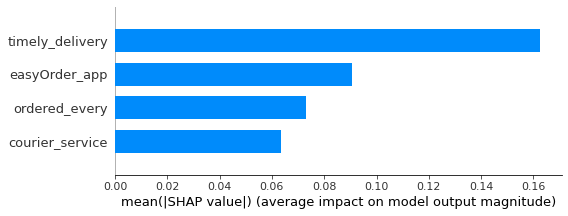

In [82]:
shap.summary_plot(shap_values_RF_train, newTrainData, plot_type="bar")

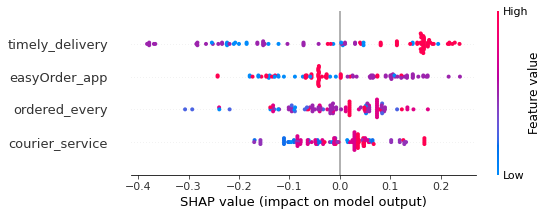

In [84]:
shap.summary_plot(shap_values_RF_train, newTrainData)

## Summary

1. Random forest with parameter settings achieved an accuarcy of 84%.
2. The combination of X1,X5 and X6 is the most important feature set which are found to be impactful by looking into feature importance plot generated from different machine learning models. 
3. X1 and X5 are the most important features.
4. Feature X2 is least important feature and can be removed from question set. 